аналіз залученості населення Європи до спорту (вподобання та причини)

## Initialisation

### Import nessecary labrires and download data 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df_init = pd.read_csv('data/output.csv')
df_init.head()

,studyno1,studyno2,doi,version,edition,survey,respondent_serial,serialid,uniqid,tnscntry,...,w9,w10,w11,w85,w86,w13,w94,w14,w22,w92
0,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,6,1,20000001,2,...,NaN,0.830778,0.274903,0.353595,NaN,NaN,NaN,0.373504,0.383012,0.394492
1,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,12,2,20000002,2,...,NaN,0.830519,0.274817,0.353484,NaN,NaN,NaN,0.373387,0.382892,0.394369
2,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,18,3,20000003,2,...,NaN,0.714949,0.236575,0.304296,NaN,NaN,NaN,0.321429,0.329612,0.339491
3,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,23,4,20000004,2,...,NaN,0.904568,0.299320,0.385001,NaN,NaN,NaN,0.406679,0.417031,0.429531
4,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,27,5,20000005,2,...,NaN,0.677808,0.224285,0.288488,NaN,NaN,NaN,0.304731,0.312488,0.321855


### Delete columns that don't conect with research

columns that started from qa, qc, d, s are questions about politics and social life

We need only data are started from qb (these are about sport), d10 (it is gender) and date are about locations and time

In [4]:
starts_unnecessary_columns = ['studyno1', 'isocntry', 'country', 'w','studyno2','polintr','netuse','capi_cawi','version','edition','qa', 'qc', 'd', 's']
def filter_unnecessary_columns(col):
    for i in starts_unnecessary_columns:
        if col.startswith(i) and not col.startswith('d10') and not col.startswith('d11'):
            return True
    return False

In [5]:
df_init.head()

,studyno1,studyno2,doi,version,edition,survey,respondent_serial,serialid,uniqid,tnscntry,...,w9,w10,w11,w85,w86,w13,w94,w14,w22,w92
0,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,6,1,20000001,2,...,NaN,0.830778,0.274903,0.353595,NaN,NaN,NaN,0.373504,0.383012,0.394492
1,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,12,2,20000002,2,...,NaN,0.830519,0.274817,0.353484,NaN,NaN,NaN,0.373387,0.382892,0.394369
2,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,18,3,20000003,2,...,NaN,0.714949,0.236575,0.304296,NaN,NaN,NaN,0.321429,0.329612,0.339491
3,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,23,4,20000004,2,...,NaN,0.904568,0.299320,0.385001,NaN,NaN,NaN,0.406679,0.417031,0.429531
4,7888,7888,doi:10.4232/1.14055,1.0.0 (2022-12-21),1,973,27,5,20000005,2,...,NaN,0.677808,0.224285,0.288488,NaN,NaN,NaN,0.304731,0.312488,0.321855


In [6]:
df = df_init.drop(columns=[col for col in df_init.columns if filter_unnecessary_columns(col)])
df.head()

,respondent_serial,uniqid,tnscntry,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,...,region_luxembourg,region_malta,region_netherlands,region_poland,region_portugal,region_romania,region_slovenia,region_slovakia,region_spain,region_sweden
0,6,20000001,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,20000002,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,20000003,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,20000004,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27,20000005,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Show all columns

In [7]:
def show_columns(columns):
    for i in range(0, len(columns), 3):
        print(columns[i:i+3])

In [98]:
show_columns(list(df.columns))

['respondent_serial', 'uniqid', 'respondent_country']
['n_BELGIUM', 'n_DENMARK', 'n_GERMANY']
['n_GREECE', 'n_SPAIN', 'n_FRANCE']
['n_IRELAND', 'n_ITALY', 'n_LUXEMBOURG']
['n_NETHERLANDS', 'n_PORTUGAL', 'n_UNITED KINGDOM']
['n_AUSTRIA', 'n_SWEDEN', 'n_FINLAND']
['n_CYPRUS', 'n_CZECH REPUBLIC', 'n_ESTONIA']
['n_HUNGARY', 'n_LATVIA', 'n_LITHUANIA']
['n_MALTA', 'n_POLAND', 'n_SLOVAKIA']
['n_SLOVENIA', 'n_BULGARIA', 'n_ROMANIA']
['n_CROATIA', 'n_OTHER COUNTRIES', 'age']
['age category', 'age large category', 'SPORT ACTIVITY FREQ']
['SPORT ACTIVITY FREQ RECODE', 'PHYS ACTIVITY FREQ', 'PHYS ACTIVITY FREQ RECODE']
['VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK', 'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE', 'VIGOROUS PHYS ACTIVITY - HOW MUCH TIME']
['MODERATE PHYS ACTIVITY - DAYS LAST WEEK', 'MODERATE PHYS ACTIVITY - DAYS LAST WEEK RECODE', 'MODERATE PHYS ACTIVITY - HOW MUCH TIME']
['WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK', 'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE', 'WALKED AT 

### Rename columns

In [9]:
renamed_columns = {
    'tnscntry': 'respondent_country',
    'q1_1': 'n_BELGIUM',
    'q1_2': 'n_DENMARK',
    'q1_3': 'n_GERMANY',
    'q1_4': 'n_GREECE',
    'q1_5': 'n_SPAIN',
    'q1_6': 'n_FRANCE',
    'q1_7': 'n_IRELAND',
    'q1_8': 'n_ITALY',
    'q1_9': 'n_LUXEMBOURG',
    'q1_10': 'n_NETHERLANDS',
    'q1_11': 'n_PORTUGAL',
    'q1_12': 'n_UNITED KINGDOM',
    'q1_13': 'n_AUSTRIA',
    'q1_14': 'n_SWEDEN',
    'q1_15': 'n_FINLAND',
    'q1_16': 'n_CYPRUS',
    'q1_17': 'n_CZECH REPUBLIC',
    'q1_18': 'n_ESTONIA',
    'q1_19': 'n_HUNGARY',
    'q1_20': 'n_LATVIA',
    'q1_21': 'n_LITHUANIA',
    'q1_22': 'n_MALTA',
    'q1_23': 'n_POLAND',
    'q1_24': 'n_SLOVAKIA',
    'q1_25': 'n_SLOVENIA',
    'q1_26': 'n_BULGARIA',
    'q1_27': 'n_ROMANIA',
    'q1_28': 'n_CROATIA',
    'q1_40': 'n_OTHER COUNTRIES',
    'q1_41': 'n_DK',
    'd11': 'age',
    'd11r1': 'age category',
    'd11r2': 'age large category',
    'qb1': 'SPORT ACTIVITY FREQ',
    'qb1r': 'SPORT ACTIVITY FREQ RECODE',
    'qb2': 'PHYS ACTIVITY FREQ',
    'qb2r': 'PHYS ACTIVITY FREQ RECODE',
    'qb3': 'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK',
    'qb3r': 'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE',
    'qb4': 'VIGOROUS PHYS ACTIVITY - HOW MUCH TIME',
    'qb5': 'MODERATE PHYS ACTIVITY - DAYS LAST WEEK',
    'qb5r': 'MODERATE PHYS ACTIVITY - DAYS LAST WEEK RECODE',
    'qb6': 'MODERATE PHYS ACTIVITY - HOW MUCH TIME',
'qb7': 'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK',
'qb7r': 'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE',
'qb8': 'WALKED AT LEAST 10 MINUTES - HOW MUCH TIME',
'qb9': 'TIME SPENT SITTING',
'qb9r': 'TIME SPENT SITTING RECODE',
'qb10_1': 'SPORT ACTIVITY VENUE: FITNESS CENTER',
'qb10_2': 'SPORT ACTIVITY VENUE: SPORTS CLUB',
'qb10_3': 'SPORT ACTIVITY VENUE: SPORTS CENTER',
'qb10_4': 'SPORT ACTIVITY VENUE: SCHOOL/UNIVERSITY',
'qb10_5': 'SPORT ACTIVITY VENUE: AT WORK',
'qb10_6': 'SPORT ACTIVITY VENUE: AT HOME',
'qb10_7': 'SPORT ACTIVITY VENUE: ON THE WAY',
'qb10_8': 'SPORT ACTIVITY VENUE: PARK/OUTDOORS',
'qb10_9': 'SPORT ACTIVITY VENUE: ELSEWHERE (SPONT)',
'qb10_10': 'SPORT ACTIVITY VENUE: DK (SPONT)',
'qb11_1': 'SPORT ACTIVITY REASON: HEALTH IMPROVEMENT',
'qb11_2': 'SPORT ACTIVITY REASON: PHYSICAL APPEARANCE',
'qb11_3': 'SPORT ACTIVITY REASON: COUNTERACT AGING',
'qb11_4': 'SPORT ACTIVITY REASON: HAVE FUN',
'qb11_5': 'SPORT ACTIVITY REASON: RELAX',
'qb11_6': 'SPORT ACTIVITY REASON: BE WITH FRIENDS',
'qb11_7': 'SPORT ACTIVITY REASON: MAKE ACQUAINTANCES',
'qb11_8': 'SPORT ACTIVITY REASON: MEET OTHER CULTURES',
'qb11_9': 'SPORT ACTIVITY REASON: PHYSICAL PERFORMANCE',
'qb11_10': 'SPORT ACTIVITY REASON: FITNESS',
'qb11_11': 'SPORT ACTIVITY REASON: CONTROL WEIGHT',
'qb11_12': 'SPORT ACTIVITY REASON: SELF-ESTEEM',
'qb11_13': 'SPORT ACTIVITY REASON: NEW SKILLS',
'qb11_14': 'SPORT ACTIVITY REASON: SPIRIT OF COMPETITION',
'qb11_15': 'SPORT ACTIVITY REASON: SOCIAL INTEGRATION',
'qb11_16': 'SPORT ACTIVITY REASON: OTHER (SPONT)',
'qb11_17': 'SPORT ACTIVITY REASON: DK (SPONT)',
'qb12_1': 'COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: STOPPED',
'qb12_2': 'COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: LESS FREQUENTLY',
'qb12_3': 'COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: SAME',
'qb12_4': 'COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: MORE FREQUENTLY',
'qb12_5': 'COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: PLAN MORE AFTER PANDEMIC',
'qb12_6': 'COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: DK (SPONT)',
'qb13_1': 'SPORT - MANY OPPORTUNITIES IN AREA',
'qb13_2': 'SPORT - MANY OPPORTUNITIES BY LOCAL SPORTS CLUBS',
'qb13_3': 'SPORT - LOCAL AUTHORITY DOES NOT DO ENOUGH',
'qb14_1': 'NO SPORT ACTIVITY REASON: NO TIME',
'qb14_2': 'NO SPORT ACTIVITY REASON: TOO EXPENSIVE',
'qb14_3': 'NO SPORT ACTIVITY REASON: COMPETITIVITY',
'qb14_4': 'NO SPORT ACTIVITY REASON: NO INFRASTRUCTURE',
'qb14_5': 'NO SPORT ACTIVITY REASON: DISABILITY/ILLNESS',
'qb14_6': 'NO SPORT ACTIVITY REASON: NO FRIENDS',
'qb14_7': 'NO SPORT ACTIVITY REASON: FEEL DISCRIMINATED',
'qb14_8': 'NO SPORT ACTIVITY REASON: NO OPPORTUNITY W SAME GENDER',
'qb14_9': 'NO SPORT ACTIVITY REASON: LACK MOTIVATION',
'qb14_10': 'NO SPORT ACTIVITY REASON: RISK OF INJURIES',
'qb14_11': 'NO SPORT ACTIVITY REASON: ALREADY DOING (SPONT)',
'qb14_12': 'NO SPORT ACTIVITY REASON: OTHER (SPONT)',
'qb14_13': 'NO SPORT ACTIVITY REASON: DK (SPONT)',
'qb15_1': 'MEMBERSHIP: HEALTH/FITNESS CENTRE',
'qb15_2': 'MEMBERSHIP: SPORT CLUB',
'qb15_3': 'MEMBERSHIP: SOCIOCULTURAL CLUB',
'qb15_4': 'MEMBERSHIP: OTHER (SPONT)',
'qb15_5': 'MEMBERSHIP: NOT A MEMBER (SPONT)',
'qb15_6': 'MEMBERSHIP: DK (SPONT)',
'qb16': 'ATTENTION ON IMPACT OF SPORT ON ENVIRONMENT',
'qb16r': 'ATTENTION ON IMPACT OF SPORT ON ENVIRONMENT RECODE',
'qb17_1': 'SUSTAINABILITY ACTION OF SPORT ORG: USE GREEN ENERGY',
'qb17_2': 'SUSTAINABILITY ACTION OF SPORT ORG: INCREASE ENERGY EFFICIENCY',
'qb17_3': 'SUSTAINABILITY ACTION OF SPORT ORG: SUSTAINABLE TRANSPORTATION',
'qb17_4': 'SUSTAINABILITY ACTION OF SPORT ORG: CRITERIA FOR FOOD/CATERING',
'qb17_5': 'SUSTAINABILITY ACTION OF SPORT ORG: REDUCE WASTE',
'qb17_6': 'SUSTAINABILITY ACTION OF SPORT ORG: NONE AS FAR AS KNOWN',
'qb17_7': 'SUSTAINABILITY ACTION OF SPORT ORG: DK (SPONT)',
'qb18': 'SUPPORT OF GENDER EQUALITY IN SPORT ORG',
'qb19': 'KNOW CONTACT TO SPEAK TO IN SPORT ORG WHEN GENDER DISCRIMINATION',
'qb20_1': 'GENDER EQUALITY IN SPORT - FEMALE ROLE MODELS INSPIRING',
'qb20_2': 'GENDER EQUALITY IN SPORT - FOLLOW FEMALE/MALE SPORT EVENLY IN MEDIA',
'qb20_3': 'GENDER EQUALITY IN SPORT - MORE ATTENTION FOR GENDER BASED VIOLENCE',
'qb21': 'VOLUNTARY WORK IN SPORT - ENGAGED OR PLANNED NEXT TWO MONTHS',
'p1': 'DATE OF INTERVIEW',
'p2': 'TIME OF INTERVIEW',
'p3': 'DURATION OF INTERVIEW (SECONDS) ',
'p4': 'N OF PERSONS PRESENT DURING INTERVIEW',
'p5': 'RESPONDENT COOPERATION',
'p6': 'SIZE OF COMMUNITY',
'p13': 'LANGUAGE OF INTERVIEW (ALL LANGUAGES)',
'd10': 'GENDER',
    }


In [10]:
df = df.rename(columns=renamed_columns)
df.head()

,respondent_serial,uniqid,respondent_country,n_BELGIUM,n_DENMARK,n_GERMANY,n_GREECE,n_SPAIN,n_FRANCE,n_IRELAND,...,region_luxembourg,region_malta,region_netherlands,region_poland,region_portugal,region_romania,region_slovenia,region_slovakia,region_spain,region_sweden
0,6,20000001,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,20000002,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,20000003,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23,20000004,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27,20000005,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

In [11]:
df.shape

(26569, 156)

In [12]:
columns = list(df.columns)
show_columns(columns)

['respondent_serial', 'uniqid', 'respondent_country']
['n_BELGIUM', 'n_DENMARK', 'n_GERMANY']
['n_GREECE', 'n_SPAIN', 'n_FRANCE']
['n_IRELAND', 'n_ITALY', 'n_LUXEMBOURG']
['n_NETHERLANDS', 'n_PORTUGAL', 'n_UNITED KINGDOM']
['n_AUSTRIA', 'n_SWEDEN', 'n_FINLAND']
['n_CYPRUS', 'n_CZECH REPUBLIC', 'n_ESTONIA']
['n_HUNGARY', 'n_LATVIA', 'n_LITHUANIA']
['n_MALTA', 'n_POLAND', 'n_SLOVAKIA']
['n_SLOVENIA', 'n_BULGARIA', 'n_ROMANIA']
['n_CROATIA', 'n_OTHER COUNTRIES', 'n_DK']
['age', 'age category', 'age large category']
['SPORT ACTIVITY FREQ', 'SPORT ACTIVITY FREQ RECODE', 'PHYS ACTIVITY FREQ']
['PHYS ACTIVITY FREQ RECODE', 'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK', 'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE']
['VIGOROUS PHYS ACTIVITY - HOW MUCH TIME', 'MODERATE PHYS ACTIVITY - DAYS LAST WEEK', 'MODERATE PHYS ACTIVITY - DAYS LAST WEEK RECODE']
['MODERATE PHYS ACTIVITY - HOW MUCH TIME', 'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK', 'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE']
['W

In [13]:
df.describe()

,respondent_serial,uniqid,respondent_country,n_BELGIUM,n_DENMARK,n_GERMANY,n_GREECE,n_SPAIN,n_FRANCE,n_IRELAND,...,region_luxembourg,region_malta,region_netherlands,region_poland,region_portugal,region_romania,region_slovenia,region_slovakia,region_spain,region_sweden
count,26569.000000,2.656900e+04,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000,...,502.000000,504.0,1032.000000,1013.000000,1005.000000,1057.000000,1022.000000,1010.000000,1006.000000,1038.000000
mean,1769.028680,2.095812e+08,20.956792,0.040724,0.037751,0.056796,0.039181,0.037224,0.040875,0.035944,...,2.601594,1.0,7.464147,7.269497,2.590050,4.240303,6.625245,2.544554,10.485089,1.815029
std,1614.011623,1.142877e+08,11.428358,0.197654,0.190596,0.231456,0.194029,0.189313,0.198004,0.186154,...,1.311943,0.0,3.039774,4.746272,1.395461,2.183132,3.616193,1.049090,4.463815,0.769780
min,1.000000,2.000000e+07,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,673.000000,1.200258e+08,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,5.000000,3.000000,1.000000,2.000000,2.000000,2.000000,8.000000,1.000000
50%,1360.000000,1.900130e+08,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,1.0,8.000000,6.000000,3.000000,4.000000,8.000000,2.000000,12.000000,2.000000
75%,2276.000000,3.200190e+08,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.0,10.000000,11.000000,4.000000,6.000000,9.000000,4.000000,15.000000,2.000000
max,8727.000000,4.200055e+08,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,1.0,12.000000,16.000000,5.000000,8.000000,12.000000,4.000000,17.000000,3.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26569 entries, 0 to 26568
Columns: 156 entries, respondent_serial to region_sweden
dtypes: float64(80), int64(76)
memory usage: 31.6 MB


In [15]:
sum(df.isnull().sum())

1125418

## Preprocessing

### Functions used for processing

In [16]:
def show_columns_info(column_name):
    print(df[column_name].value_counts())
    print(f'Null values: {df[column_name].isnull().sum()}')
    print(f'Type values: {df[column_name].dtype}')
    print()

In [17]:
def replace_values(column_name, data_map):
    df[column_name] = df[column_name].replace(data_map)
    show_columns_info(column_name)

In [18]:
def multiple_replace(columns_map):
    for col,data in columns_map.items():
        replace_values(col, data)

### Identification user data

#### Show information about all data

In [19]:
c_columns = ['respondent_serial', 'uniqid', 'respondent_country']

for i in c_columns:
    show_columns_info(i)

respondent_serial
1148    17
1364    17
323     17
756     16
1251    16
        ..
8631     1
8632     1
8633     1
8634     1
8635     1
Name: count, Length: 5816, dtype: int64
Null values: 0
Type values: int64

uniqid
150026578    1
20000001     1
20000002     1
20000003     1
20000004     1
            ..
20000013     1
20000014     1
20000015     1
20000016     1
20000017     1
Name: count, Length: 26569, dtype: int64
Null values: 0
Type values: int64

respondent_country
3     1101
9     1073
33    1057
35    1043
4     1039
29    1032
12    1030
18    1025
36    1022
21    1020
41    1015
13    1014
31    1013
25    1013
16    1012
19    1011
37    1010
17    1008
14    1006
2     1005
32    1005
15    1004
11    1004
23    1002
28     504
7      503
24     502
42     496
Name: count, dtype: int64
Null values: 0
Type values: int64



#### Respondent country data to replace

In [20]:
res_map = {
    1: 'Albania',
    2: 'Austria',
    3: 'Belgium',
    4: 'Bulgaria',
    5: 'Bosnia and Herzegovina',
    6: 'Switzerland',
    7: 'Cyprus',
    8: 'Cyprus - CY',
    9: 'Czech Republic',
    10: 'Germany',
    11: 'Denmark',
    12: 'Estonia',
    13: 'Greece',
    14: 'Spain',
    15: 'Finland',
    16: 'France',
    17: 'Croatia',
    18: 'Hungary',
    19: 'Ireland',
    20: 'Iceland',
    21: 'Italy',
    22: 'Kosovo',
    23: 'Lithuania',
    24: 'Luxemburg',
    25: 'Latvia',
    26: 'Montenegro',
    27: 'Macedonia',
    28: 'Malta',
    29: 'Netherlands',
    30: 'Norway',
    31: 'Poland',
    32: 'Portugal',
    33: 'Romania',
    34: 'Serbia',
    35: 'Sweden',
    36: 'Slovenia',
    37: 'Slovakia',
    38: 'Turkey',
    39: 'United Kingdom',
    40: 'None',
    41: 'Germany',
    42: 'Germany'
}

replace_values('respondent_country', res_map)

respondent_country
Germany           1511
Belgium           1101
Czech Republic    1073
Romania           1057
Sweden            1043
Bulgaria          1039
Netherlands       1032
Estonia           1030
Hungary           1025
Slovenia          1022
Italy             1020
Greece            1014
Latvia            1013
Poland            1013
France            1012
Ireland           1011
Slovakia          1010
Croatia           1008
Spain             1006
Portugal          1005
Austria           1005
Denmark           1004
Finland           1004
Lithuania         1002
Malta              504
Cyprus             503
Luxemburg          502
Name: count, dtype: int64
Null values: 0
Type values: object



### Show data on respondents nationality

In [21]:
columns = list(df.columns)
n_columns = list(filter(lambda x: x.startswith('n_'), columns))

for i in n_columns: 
    show_columns_info(i)

n_BELGIUM
0    25487
1     1082
Name: count, dtype: int64
Null values: 0
Type values: int64

n_DENMARK
0    25566
1     1003
Name: count, dtype: int64
Null values: 0
Type values: int64

n_GERMANY
0    25060
1     1509
Name: count, dtype: int64
Null values: 0
Type values: int64

n_GREECE
0    25528
1     1041
Name: count, dtype: int64
Null values: 0
Type values: int64

n_SPAIN
0    25580
1      989
Name: count, dtype: int64
Null values: 0
Type values: int64

n_FRANCE
0    25483
1     1086
Name: count, dtype: int64
Null values: 0
Type values: int64

n_IRELAND
0    25614
1      955
Name: count, dtype: int64
Null values: 0
Type values: int64

n_ITALY
0    25484
1     1085
Name: count, dtype: int64
Null values: 0
Type values: int64

n_LUXEMBOURG
0    26266
1      303
Name: count, dtype: int64
Null values: 0
Type values: int64

n_NETHERLANDS
0    25520
1     1049
Name: count, dtype: int64
Null values: 0
Type values: int64

n_PORTUGAL
0    25474
1     1095
Name: count, dtype: int64
Null value

In [22]:
df = df.drop(['n_DK'], axis=1)

### Age data

In [23]:
columns = list(df.columns)
age_columns = []

for i in columns:
    if i.startswith('age'):
        age_columns.append(i)

age_columns

['age', 'age category', 'age large category']

#### Show information about age data

In [24]:
for i in age_columns:
    show_columns_info(i)

age
60    543
65    537
70    526
58    523
68    521
     ... 
93      8
95      5
96      2
97      2
98      1
Name: count, Length: 85, dtype: int64
Null values: 0
Type values: int64

age category
4    12236
3     6523
2     5417
1     2381
5       12
Name: count, dtype: int64
Null values: 0
Type values: int64

age large category
6    7408
5    4828
4    4481
3    4127
2    3332
1    2381
7      12
Name: count, dtype: int64
Null values: 0
Type values: int64



#### data to replace 

In [25]:
age_category_map = {1: '15-24',
            2: '25-39',
            3: '40-54',
            4: '55-98',
            5: 'Refusal',}

age_large_category_map = {
    1: '15-24',
    2: '25-34',
    3: '35-44',
    4: '45-54',
    5: '55-64',
    6: '65+',
    7: 'Refusal'}

columns_maps = {
    'age category': age_category_map, 
    'age large category': age_large_category_map
}

#### replace number data to categorical data in respondents age

In [26]:
multiple_replace(columns_maps)

age category
55-98      12236
40-54       6523
25-39       5417
15-24       2381
Refusal       12
Name: count, dtype: int64
Null values: 0
Type values: object

age large category
65+        7408
55-64      4828
45-54      4481
35-44      4127
25-34      3332
15-24      2381
Refusal      12
Name: count, dtype: int64
Null values: 0
Type values: object



### Sport data

#### show data about sport

In [27]:
no_sport_columns = ['respondent_serial', 'uniqid', 'tnscntry', 'country', 
                              'isocntry', 'n_', 'age', 'region', 'GENDER', 'DATE OF INTERVIEW', 
                              'TIME OF INTERVIEW', 'DURATION OF INTERVIEW (SECONDS)', 
                              'N OF PERSONS PRESENT DURING INTERVIEW', 'RESPONDENT COOPERATION', 
                              'SIZE OF COMMUNITY', 'LANGUAGE OF INTERVIEW (ALL LANGUAGES)',]

In [28]:
def filter_columns(col, unnecessary_columns):
    for i in unnecessary_columns:
        if col.startswith(i):
            return False
    return True

In [29]:
columns = list(df.columns)
act_columns = []

for col in columns:
    if filter_columns(col, no_sport_columns):
        act_columns.append(col)

show_columns(act_columns)

['respondent_country', 'SPORT ACTIVITY FREQ', 'SPORT ACTIVITY FREQ RECODE']
['PHYS ACTIVITY FREQ', 'PHYS ACTIVITY FREQ RECODE', 'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK']
['VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE', 'VIGOROUS PHYS ACTIVITY - HOW MUCH TIME', 'MODERATE PHYS ACTIVITY - DAYS LAST WEEK']
['MODERATE PHYS ACTIVITY - DAYS LAST WEEK RECODE', 'MODERATE PHYS ACTIVITY - HOW MUCH TIME', 'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK']
['WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE', 'WALKED AT LEAST 10 MINUTES - HOW MUCH TIME', 'TIME SPENT SITTING']
['TIME SPENT SITTING RECODE', 'SPORT ACTIVITY VENUE: FITNESS CENTER', 'SPORT ACTIVITY VENUE: SPORTS CLUB']
['SPORT ACTIVITY VENUE: SPORTS CENTER', 'SPORT ACTIVITY VENUE: SCHOOL/UNIVERSITY', 'SPORT ACTIVITY VENUE: AT WORK']
['SPORT ACTIVITY VENUE: AT HOME', 'SPORT ACTIVITY VENUE: ON THE WAY', 'SPORT ACTIVITY VENUE: PARK/OUTDOORS']
['SPORT ACTIVITY VENUE: ELSEWHERE (SPONT)', 'SPORT ACTIVITY VENUE: DK (SPONT)', 'SPORT ACTIVITY RE

### freq

#### init freq

In [30]:
columns = list(df.columns)
freq_columns = []

for i in columns:
    if 'FREQ' in i:
        freq_columns.append(i)

for i in freq_columns:
    show_columns_info(i)

SPORT ACTIVITY FREQ
6    11161
3     5047
5     3563
2     3253
1     1876
4     1642
7       27
Name: count, dtype: int64
Null values: 0
Type values: int64

SPORT ACTIVITY FREQ RECODE
4    11161
2     8300
3     5205
1     1876
5       27
Name: count, dtype: int64
Null values: 0
Type values: int64

PHYS ACTIVITY FREQ
6    7145
3    5761
1    4308
2    3991
5    3185
4    2146
7      33
Name: count, dtype: int64
Null values: 0
Type values: int64

PHYS ACTIVITY FREQ RECODE
2    9752
4    7145
3    5331
1    4308
5      33
Name: count, dtype: int64
Null values: 0
Type values: int64

COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: LESS FREQUENTLY
0.0    13778
1.0     6536
Name: count, dtype: int64
Null values: 6255
Type values: float64

COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: MORE FREQUENTLY
0.0    18520
1.0     1794
Name: count, dtype: int64
Null values: 6255
Type values: float64



In [31]:
df = df.drop(columns=['COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: LESS FREQUENTLY',
                      'COVID-19 IMPACT ON PHYSICAL ACTIVITY/SPORT: MORE FREQUENTLY'])

columns = list(df.columns)
freq_columns = []

for i in columns:
    if 'FREQ' in i:
        freq_columns.append(i)

for i in freq_columns:
    show_columns_info(i)

SPORT ACTIVITY FREQ
6    11161
3     5047
5     3563
2     3253
1     1876
4     1642
7       27
Name: count, dtype: int64
Null values: 0
Type values: int64

SPORT ACTIVITY FREQ RECODE
4    11161
2     8300
3     5205
1     1876
5       27
Name: count, dtype: int64
Null values: 0
Type values: int64

PHYS ACTIVITY FREQ
6    7145
3    5761
1    4308
2    3991
5    3185
4    2146
7      33
Name: count, dtype: int64
Null values: 0
Type values: int64

PHYS ACTIVITY FREQ RECODE
2    9752
4    7145
3    5331
1    4308
5      33
Name: count, dtype: int64
Null values: 0
Type values: int64



#### data to replace

In [32]:
freq_map = {
    1: '5 or > a week',
    2: '3 to 4 a week',
    3: '1 to 2 times a week',
    4: '1 to 3 times a month',
    5: 'Less often',
    6: 'Never',
    7: 'DK (SPONT.)',}

freq_recode_map = {
    1: 'Regularly (1 in SPORT ACTIVITY FREQ)',
    2: 'With some regularity (2 and 3 in SPORT ACTIVITY FREQ)',
    3: 'Seldom (4 and 5 in SPORT ACTIVITY FREQ)',
    4: 'Never',
    5: 'DK (SPONT.)'}

columns_maps = {
    'SPORT ACTIVITY FREQ': freq_map,
    'SPORT ACTIVITY FREQ RECODE': freq_recode_map,
    'PHYS ACTIVITY FREQ': freq_map,
    'PHYS ACTIVITY FREQ RECODE': freq_recode_map,
}

#### replace number data to categorical data in respondents sport/physical frequency activity

In [33]:
multiple_replace(columns_maps)

SPORT ACTIVITY FREQ
Never                   11161
1 to 2 times a week      5047
Less often               3563
3 to 4 a week            3253
5 or > a week            1876
1 to 3 times a month     1642
DK (SPONT.)                27
Name: count, dtype: int64
Null values: 0
Type values: object

SPORT ACTIVITY FREQ RECODE
Never                                                    11161
With some regularity (2 and 3 in SPORT ACTIVITY FREQ)     8300
Seldom (4 and 5 in SPORT ACTIVITY FREQ)                   5205
Regularly (1 in SPORT ACTIVITY FREQ)                      1876
DK (SPONT.)                                                 27
Name: count, dtype: int64
Null values: 0
Type values: object

PHYS ACTIVITY FREQ
Never                   7145
1 to 2 times a week     5761
5 or > a week           4308
3 to 4 a week           3991
Less often              3185
1 to 3 times a month    2146
DK (SPONT.)               33
Name: count, dtype: int64
Null values: 0
Type values: object

PHYS ACTIVITY FREQ R

### Physical Activity (Days & Duration)

#### init

In [34]:
columns = list(df.columns)
p_a_columns = []

for i in columns:
    if i.endswith('DAYS LAST WEEK') or i.endswith('DAYS LAST WEEK RECODE') or i.endswith('HOW MUCH TIME'):
        p_a_columns.append(i)

for i in p_a_columns:
    show_columns_info(i)

VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK
8.0    6643
2.0    3410
3.0    2632
1.0    2594
4.0    1682
5.0    1530
7.0    1237
6.0     561
9.0      25
Name: count, dtype: int64
Null values: 6255
Type values: float64

VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE
2.0    8636
1.0    6643
3.0    5010
4.0      25
Name: count, dtype: int64
Null values: 6255
Type values: float64

VIGOROUS PHYS ACTIVITY - HOW MUCH TIME
2.0    6307
6.0    4009
3.0    3538
1.0    3266
5.0    1680
4.0    1439
7.0      75
Name: count, dtype: int64
Null values: 6255
Type values: float64

MODERATE PHYS ACTIVITY - DAYS LAST WEEK
8.0    4379
2.0    3681
3.0    3036
7.0    2360
1.0    2294
4.0    1914
5.0    1872
6.0     728
9.0      50
Name: count, dtype: int64
Null values: 6255
Type values: float64

MODERATE PHYS ACTIVITY - DAYS LAST WEEK RECODE
2.0    9011
3.0    6874
1.0    4379
4.0      50
Name: count, dtype: int64
Null values: 6255
Type values: float64

MODERATE PHYS ACTIVITY - HOW MUCH TIME
2.0    7359
1.0    429

#### data to replace

In [35]:
last_week_map = {
    1: 'Never (8 in LAST WEEK)',
    2: '1-3 days (1 to 3 in qb3)',
    3: '4-7 days (4 to 7 in qb3)',
    4: 'DK (SPONT.)',
    9: 'Inap. (not 1 to 5 in PHYS and SPORT ACTIVITY )',
    np.nan: 'DK (SPONT.)'}

last_week_r_map = {
    1: 'Never (8 in LAST WEEK)',
    2: '1-3 days (1 to 3 in qb3)',
    3: '4-7 days (4 to 7 in qb3)',
    4: 'DK (SPONT.)',
    9: 'Inap. (not 1 to 5 in PHYS and SPORT ACTIVITY )',
    np.nan: 'DK (SPONT.)'}

time_map = {
    1: '30 minutes or less',
    2: '31 to 60 minutes',
    3: '61 to 90 minutes',
    4: '91 to 120 minutes',
    5: 'More than 120 minutes',
    6: 'Never do any vigorous physical activity',
    7: 'DK (SPONT.)',
    9: 'Inap. (not 1 to 5 in PHYS and',
    np.nan: 'DK (SPONT.)'}

columns_maps = {
    'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK': last_week_map,
    'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE': last_week_r_map,
    'VIGOROUS PHYS ACTIVITY - HOW MUCH TIME': time_map,
    'MODERATE PHYS ACTIVITY - DAYS LAST WEEK': last_week_map,
    'MODERATE PHYS ACTIVITY - DAYS LAST WEEK RECODE': last_week_r_map,
    'MODERATE PHYS ACTIVITY - HOW MUCH TIME': time_map,
    'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK': last_week_map,
    'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE': last_week_r_map,
    'WALKED AT LEAST 10 MINUTES - HOW MUCH TIME': time_map
}


#### replace

In [36]:
multiple_replace(columns_maps)

VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK
DK (SPONT.)                                       7937
8.0                                               6643
1-3 days (1 to 3 in qb3)                          3410
4-7 days (4 to 7 in qb3)                          2632
Never (8 in LAST WEEK)                            2594
5.0                                               1530
7.0                                               1237
6.0                                                561
Inap. (not 1 to 5 in PHYS and SPORT ACTIVITY )      25
Name: count, dtype: int64
Null values: 0
Type values: object

VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE
1-3 days (1 to 3 in qb3)    8636
Never (8 in LAST WEEK)      6643
DK (SPONT.)                 6280
4-7 days (4 to 7 in qb3)    5010
Name: count, dtype: int64
Null values: 0
Type values: object

VIGOROUS PHYS ACTIVITY - HOW MUCH TIME
DK (SPONT.)                                6330
31 to 60 minutes                           6307
Never do any vigorous physi

### time sitting

#### init

In [37]:
columns = list(df.columns)
t_s_columns = []

for i in columns:
    if i.startswith('TIME SPENT SITTING'):
        t_s_columns.append(i)

for i in t_s_columns:
    show_columns_info(i)

TIME SPENT SITTING
5     4035
6     3741
4     3359
7     3285
10    3260
8     2479
9     2035
3     1932
1     1121
2      982
11     340
Name: count, dtype: int64
Null values: 0
Type values: int64

TIME SPENT SITTING RECODE
2    11135
3     7799
1     4035
4     3260
5      340
Name: count, dtype: int64
Null values: 0
Type values: int64



#### data

In [38]:
t_map = {
        1: '1 hour or less',
        2: '1 hour 1 minute to 1 hour and 30 minutes',
        3: '1 hour 31 minutes to 2 hours 30 minutes',
        4: '2 hours 31 minutes to 3 hours 30 minutes',
        5: '3 hours 31 minutes to 4 hours 30 minutes',
        6: '4 hours 31 minutes to 5 hours 30 minutes',
        7: '5 hours 31 minutes to 6 hours 30 minutes',
        8: '6 hours 31 minutes to 7 hours 30 minutes',
        9: '7 hours 31 minutes to 8 hours 30 minutes',
        10: 'More than 8 hours and 30 minutes',
        11: 'DK (SPONT.)'}

t_r_map = {
        1: '2h 30min or less',
        2: '2h31min to 5h30min',
        3: '5h31min to 8h30min',
        4: '8h31min or more',
        5: 'DK (SPONT.)'
}

columns_maps = {
    'TIME SPENT SITTING': t_map,
    'TIME SPENT SITTING RECODE': t_r_map
}

#### replace

In [39]:
multiple_replace(columns_maps)

TIME SPENT SITTING
3 hours 31 minutes to 4 hours 30 minutes    4035
4 hours 31 minutes to 5 hours 30 minutes    3741
2 hours 31 minutes to 3 hours 30 minutes    3359
5 hours 31 minutes to 6 hours 30 minutes    3285
More than 8 hours and 30 minutes            3260
6 hours 31 minutes to 7 hours 30 minutes    2479
7 hours 31 minutes to 8 hours 30 minutes    2035
1 hour 31 minutes to 2 hours 30 minutes     1932
1 hour or less                              1121
1 hour 1 minute to 1 hour and 30 minutes     982
DK (SPONT.)                                  340
Name: count, dtype: int64
Null values: 0
Type values: object

TIME SPENT SITTING RECODE
2h31min to 5h30min    11135
5h31min to 8h30min     7799
2h 30min or less       4035
8h31min or more        3260
DK (SPONT.)             340
Name: count, dtype: int64
Null values: 0
Type values: object



### Other sport question where answers are 0 or 1

#### init

In [40]:
columns = list(df.columns)
m_columns = []

for i in columns:
    if i.startswith('MEMBERSHIP'):
        m_columns.append(i)

df = df.drop(columns=m_columns)

In [41]:
columns = list(df.columns)
start_words = ['SPORT ACTIVITY VENUE', 'SPORT ACTIVITY REASON', 'NO SPORT ACTIVITY REASON']

other_columns = []
for i in columns:
    for word in start_words:
        if i.startswith(word):
            other_columns.append(i)

for i in other_columns:
    show_columns_info(i)

SPORT ACTIVITY VENUE: FITNESS CENTER
0.0    17643
1.0     2671
Name: count, dtype: int64
Null values: 6255
Type values: float64

SPORT ACTIVITY VENUE: SPORTS CLUB
0.0    18423
1.0     1891
Name: count, dtype: int64
Null values: 6255
Type values: float64

SPORT ACTIVITY VENUE: SPORTS CENTER
0.0    18904
1.0     1410
Name: count, dtype: int64
Null values: 6255
Type values: float64

SPORT ACTIVITY VENUE: SCHOOL/UNIVERSITY
0.0    19691
1.0      623
Name: count, dtype: int64
Null values: 6255
Type values: float64

SPORT ACTIVITY VENUE: AT WORK
0.0    17950
1.0     2364
Name: count, dtype: int64
Null values: 6255
Type values: float64

SPORT ACTIVITY VENUE: AT HOME
0.0    11116
1.0     9198
Name: count, dtype: int64
Null values: 6255
Type values: float64

SPORT ACTIVITY VENUE: ON THE WAY
0.0    15064
1.0     5250
Name: count, dtype: int64
Null values: 6255
Type values: float64

SPORT ACTIVITY VENUE: PARK/OUTDOORS
0.0    10921
1.0     9393
Name: count, dtype: int64
Null values: 6255
Type value

#### data

In [42]:
other_map = {np.nan: 'Nan'}
columns_maps = {
    'SPORT ACTIVITY VENUE: FITNESS CENTER': other_map,
    'SPORT ACTIVITY VENUE: SPORTS CLUB': other_map, 
    'SPORT ACTIVITY VENUE: SPORTS CENTER': other_map,
    'SPORT ACTIVITY VENUE: SCHOOL/UNIVERSITY': other_map,
    'SPORT ACTIVITY VENUE: AT WORK': other_map,
    'SPORT ACTIVITY VENUE: AT HOME': other_map,
    'SPORT ACTIVITY VENUE: ON THE WAY': other_map,
    'SPORT ACTIVITY VENUE: PARK/OUTDOORS': other_map,
    'SPORT ACTIVITY VENUE: ELSEWHERE (SPONT)': other_map,
    'SPORT ACTIVITY VENUE: DK (SPONT)': other_map,
    'SPORT ACTIVITY REASON: HEALTH IMPROVEMENT': other_map,
    'SPORT ACTIVITY REASON: PHYSICAL APPEARANCE': other_map,
    'SPORT ACTIVITY REASON: COUNTERACT AGING': other_map,
    'SPORT ACTIVITY REASON: HAVE FUN': other_map,
    'SPORT ACTIVITY REASON: RELAX': other_map,
    'SPORT ACTIVITY REASON: BE WITH FRIENDS': other_map,
    'SPORT ACTIVITY REASON: MAKE ACQUAINTANCES': other_map,
    'SPORT ACTIVITY REASON: MEET OTHER CULTURES': other_map,
    'SPORT ACTIVITY REASON: PHYSICAL PERFORMANCE': other_map,
    'SPORT ACTIVITY REASON: FITNESS': other_map,
    'SPORT ACTIVITY REASON: CONTROL WEIGHT': other_map,
    'SPORT ACTIVITY REASON: SELF-ESTEEM': other_map,
    'SPORT ACTIVITY REASON: NEW SKILLS': other_map,
    'SPORT ACTIVITY REASON: SPIRIT OF COMPETITION': other_map,
    'SPORT ACTIVITY REASON: SOCIAL INTEGRATION': other_map,
    'SPORT ACTIVITY REASON: OTHER (SPONT)': other_map,
    'SPORT ACTIVITY REASON: DK (SPONT)': other_map,
    'NO SPORT ACTIVITY REASON: NO TIME': other_map,
    'NO SPORT ACTIVITY REASON: TOO EXPENSIVE': other_map,
    'NO SPORT ACTIVITY REASON: COMPETITIVITY': other_map,
    'NO SPORT ACTIVITY REASON: NO INFRASTRUCTURE': other_map,
    'NO SPORT ACTIVITY REASON: DISABILITY/ILLNESS': other_map,
    'NO SPORT ACTIVITY REASON: NO FRIENDS': other_map,
    'NO SPORT ACTIVITY REASON: FEEL DISCRIMINATED': other_map,
    'NO SPORT ACTIVITY REASON: NO OPPORTUNITY W SAME GENDER': other_map,
    'NO SPORT ACTIVITY REASON: LACK MOTIVATION': other_map,
    'NO SPORT ACTIVITY REASON: RISK OF INJURIES': other_map
    ,'NO SPORT ACTIVITY REASON: ALREADY DOING (SPONT)': other_map,
    'NO SPORT ACTIVITY REASON: OTHER (SPONT)': other_map,
    'NO SPORT ACTIVITY REASON: DK (SPONT)': other_map,
}

#### replace

In [43]:
multiple_replace(columns_maps)

SPORT ACTIVITY VENUE: FITNESS CENTER
0.0    17643
Nan     6255
1.0     2671
Name: count, dtype: int64
Null values: 0
Type values: object

SPORT ACTIVITY VENUE: SPORTS CLUB
0.0    18423
Nan     6255
1.0     1891
Name: count, dtype: int64
Null values: 0
Type values: object

SPORT ACTIVITY VENUE: SPORTS CENTER
0.0    18904
Nan     6255
1.0     1410
Name: count, dtype: int64
Null values: 0
Type values: object

SPORT ACTIVITY VENUE: SCHOOL/UNIVERSITY
0.0    19691
Nan     6255
1.0      623
Name: count, dtype: int64
Null values: 0
Type values: object

SPORT ACTIVITY VENUE: AT WORK
0.0    17950
Nan     6255
1.0     2364
Name: count, dtype: int64
Null values: 0
Type values: object

SPORT ACTIVITY VENUE: AT HOME
0.0    11116
1.0     9198
Nan     6255
Name: count, dtype: int64
Null values: 0
Type values: object

SPORT ACTIVITY VENUE: ON THE WAY
0.0    15064
Nan     6255
1.0     5250
Name: count, dtype: int64
Null values: 0
Type values: object

SPORT ACTIVITY VENUE: PARK/OUTDOORS
0.0    10921
1.0 

### Datetime

In [44]:
show_columns_info('DATE OF INTERVIEW')

DATE OF INTERVIEW
8.0     1551
9.0     1536
10.0    1455
11.0    1453
12.0    1410
19.0    1368
17.0    1286
22.0    1258
15.0    1230
18.0    1180
16.0    1167
13.0    1156
20.0    1083
5.0      924
6.0      918
23.0     888
4.0      830
24.0     815
25.0     815
14.0     695
3.0      654
7.0      643
21.0     623
26.0     552
27.0     377
28.0     277
2.0      228
29.0     185
1.0        4
Name: count, dtype: int64
Null values: 8
Type values: float64



In [45]:
df = df.dropna(subset=['DATE OF INTERVIEW'])
df['DATE OF INTERVIEW'].isnull().sum()

np.int64(0)

In [46]:
date_map = {
            1:	'17-Apr-22',
            2:	'19-Apr-22',
            3:	'20-Apr-22',
            4:	'21-Apr-22',
            5:	'22-Apr-22',
            6:	'23-Apr-22',
            7:	'24-Apr-22',
            8:	'25-Apr-22',
            9:	'26-Apr-22',
            10:	'27-Apr-22',
            11:	'28-Apr-22',
            12:	'29-Apr-22',
            13:	'30-Apr-22',
            14:	'1-May-22',
            15:	'2-May-22',
            16:	'3-May-22',
            17:	'4-May-22',
            18:	'5-May-22',
            19:	'6-May-22',
            20:	'7-May-22',
            21:	'8-May-22',
            22:	'9-May-22',
            23:	'10-May-22',
            24:	'11-May-22',
            25:	'12-May-22',
            26:	'13-May-22',
            27:	'14-May-22',
            28:	'15-May-22',
            29:	'16-May-22',
            30:	'30-Mar-22',
            31:	'31-Dec-08'
}

replace_values('DATE OF INTERVIEW', date_map)

DATE OF INTERVIEW
25-Apr-22    1551
26-Apr-22    1536
27-Apr-22    1455
28-Apr-22    1453
29-Apr-22    1410
6-May-22     1368
4-May-22     1286
9-May-22     1258
2-May-22     1230
5-May-22     1180
3-May-22     1167
30-Apr-22    1156
7-May-22     1083
22-Apr-22     924
23-Apr-22     918
10-May-22     888
21-Apr-22     830
11-May-22     815
12-May-22     815
1-May-22      695
20-Apr-22     654
24-Apr-22     643
8-May-22      623
13-May-22     552
14-May-22     377
15-May-22     277
19-Apr-22     228
16-May-22     185
17-Apr-22       4
Name: count, dtype: int64
Null values: 0
Type values: object



In [47]:
df['DATE OF INTERVIEW'] = pd.to_datetime(df['DATE OF INTERVIEW'], errors='coerce', dayfirst=True)
df['DATE OF INTERVIEW'].dtype

C:\Users\denze\AppData\Local\Temp\ipykernel_16720\2688295885.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OF INTERVIEW'] = pd.to_datetime(df['DATE OF INTERVIEW'], errors='coerce', dayfirst=True)


dtype('<M8[ns]')

In [48]:
df['DATE OF INTERVIEW'].value_counts()

DATE OF INTERVIEW
2022-04-25    1551
2022-04-26    1536
2022-04-27    1455
2022-04-28    1453
2022-04-29    1410
2022-05-06    1368
2022-05-04    1286
2022-05-09    1258
2022-05-02    1230
2022-05-05    1180
2022-05-03    1167
2022-04-30    1156
2022-05-07    1083
2022-04-22     924
2022-04-23     918
2022-05-10     888
2022-04-21     830
2022-05-11     815
2022-05-12     815
2022-05-01     695
2022-04-20     654
2022-04-24     643
2022-05-08     623
2022-05-13     552
2022-05-14     377
2022-05-15     277
2022-04-19     228
2022-05-16     185
2022-04-17       4
Name: count, dtype: int64

### region

#### init

In [49]:
columns = list(df.columns)
r_columns = []

for i in columns:
    if i.startswith('region'):
        r_columns.append(i)

for i in r_columns:
    show_columns_info(i)

region_austria
9.0    265
8.0    185
4.0    152
6.0    145
3.0     70
1.0     58
2.0     51
5.0     49
7.0     30
Name: count, dtype: int64
Null values: 25556
Type values: float64

region_belgium
8.0     166
2.0     164
1.0     143
4.0     119
9.0     107
6.0     107
5.0      93
3.0      71
7.0      57
11.0     50
10.0     24
Name: count, dtype: int64
Null values: 25460
Type values: float64

region_bulgaria
5.0    297
6.0    208
4.0    168
3.0    125
2.0    124
1.0    117
Name: count, dtype: int64
Null values: 25522
Type values: float64

region_croatia
2.0    619
1.0    389
Name: count, dtype: int64
Null values: 25553
Type values: float64

region_cyprus
1.0    199
2.0    144
3.0     88
4.0     40
5.0     32
Name: count, dtype: int64
Null values: 26058
Type values: float64

region_czechia
1.0    191
6.0    171
5.0    143
2.0    138
3.0    118
4.0    117
7.0    100
8.0     93
Name: count, dtype: int64
Null values: 25490
Type values: float64

region_denmark
1.0    293
3.0    274
4.0    20

#### show all columns

In [50]:
show_columns(r_columns)

['region_austria', 'region_belgium', 'region_bulgaria']
['region_croatia', 'region_cyprus', 'region_czechia']
['region_denmark', 'region_germany', 'region_estonia']
['region_finland', 'region_france', 'region_greece']
['region_hungary', 'region_ireland', 'region_italy']
['region_latvia', 'region_lithuania', 'region_luxembourg']
['region_malta', 'region_netherlands', 'region_poland']
['region_portugal', 'region_romania', 'region_slovenia']
['region_slovakia', 'region_spain', 'region_sweden']


#### data

In [51]:
region_map = {
    8: 'None',
    9: 'DK (SPONT.)',
    np.nan: 'None'
}

columns_maps = {
    'region_austria': region_map,
    'region_belgium': region_map,
    'region_denmark': region_map,
    'region_estonia': region_map,
    'region_finland': region_map,
    'region_france': region_map,
    'region_germany': region_map,
    'region_greece': region_map,
    'region_hungary': region_map,
    'region_ireland': region_map,
    'region_italy': region_map,
    'region_latvia': region_map,
    'region_lithuania': region_map,
    'region_luxembourg': region_map,
    'region_malta': region_map,
    'region_netherlands': region_map,
    'region_poland': region_map,
    'region_portugal': region_map,
    'region_romania': region_map,
    'region_slovenia': region_map,
    'region_slovakia': region_map,
    'region_spain': region_map,
    'region_sweden': region_map,
}

#### replace

In [52]:
multiple_replace(columns_maps)

region_austria
None           25741
DK (SPONT.)      265
4.0              152
6.0              145
3.0               70
1.0               58
2.0               51
5.0               49
7.0               30
Name: count, dtype: int64
Null values: 0
Type values: object

region_belgium
None           25626
2.0              164
1.0              143
4.0              119
DK (SPONT.)      107
6.0              107
5.0               93
3.0               71
7.0               57
11.0              50
10.0              24
Name: count, dtype: int64
Null values: 0
Type values: object

region_denmark
None    25557
1.0       293
3.0       274
4.0       200
2.0       143
5.0        94
Name: count, dtype: int64
Null values: 0
Type values: object

region_estonia
None    25531
1.0       471
5.0       257
2.0       120
4.0       104
3.0        78
Name: count, dtype: int64
Null values: 0
Type values: object

region_finland
None    25563
4.0       269
3.0       250
2.0       243
1.0       236
Name: count, dtype:

### Clear other unneseccary columns

In [53]:
delete_columns = ['ATTENTION ON IMPACT OF SPORT ON ENVIRONMENT', 'ATTENTION ON IMPACT OF SPORT ON ENVIRONMENT RECODE', 
                  'SUSTAINABILITY ACTION OF SPORT ORG: USE GREEN ENERGY', 'SUSTAINABILITY ACTION OF SPORT ORG: INCREASE ENERGY EFFICIENCY',
                  'SUSTAINABILITY ACTION OF SPORT ORG: SUSTAINABLE TRANSPORTATION', 'SUSTAINABILITY ACTION OF SPORT ORG: CRITERIA FOR FOOD/CATERING',
                  'SUSTAINABILITY ACTION OF SPORT ORG: REDUCE WASTE', 'SUSTAINABILITY ACTION OF SPORT ORG: NONE AS FAR AS KNOWN',
                  'SUSTAINABILITY ACTION OF SPORT ORG: DK (SPONT)', 'SUPPORT OF GENDER EQUALITY IN SPORT ORG',
                  'KNOW CONTACT TO SPEAK TO IN SPORT ORG WHEN GENDER DISCRIMINATION', 'GENDER EQUALITY IN SPORT - FEMALE ROLE MODELS INSPIRING',
                  'GENDER EQUALITY IN SPORT - FOLLOW FEMALE/MALE SPORT EVENLY IN MEDIA', 
                  'GENDER EQUALITY IN SPORT - MORE ATTENTION FOR GENDER BASED VIOLENCE',
                  'VOLUNTARY WORK IN SPORT - ENGAGED OR PLANNED NEXT TWO MONTHS', 'DURATION OF INTERVIEW (SECONDS) ', 'N OF PERSONS PRESENT DURING INTERVIEW', 
                  'TIME OF INTERVIEW', 'RESPONDENT COOPERATION',
                  'SIZE OF COMMUNITY', 'LANGUAGE OF INTERVIEW (ALL LANGUAGES)',
                  'SPORT - MANY OPPORTUNITIES IN AREA',
                  'SPORT - MANY OPPORTUNITIES BY LOCAL SPORTS CLUBS', 
                  'SPORT - LOCAL AUTHORITY DOES NOT DO ENOUGH',]

df = df.drop(columns=delete_columns, axis=1)
df.shape

(26561, 123)

## Feature engneering

function to create pivot column

In [54]:
def get_column(row, replace_words, columns):
    values = []
    for col in columns:
        if row[col] == 1:
            c = col.replace(replace_words, '')
            values.append(c)
    return ', '.join(values) 

### create nationality column

In [55]:
columns = list(df.columns)
start_words = 'n_'
n_columns = list(filter(lambda x: x.startswith(start_words), columns))

df['nationality'] = df.apply(lambda row: get_column(row, start_words, n_columns), axis=1)
show_columns_info('nationality')

nationality
GERMANY                                      1464
ROMANIA                                      1078
PORTUGAL                                     1068
ITALY                                        1067
POLAND                                       1064
                                             ... 
SWEDEN, HUNGARY, CROATIA, OTHER COUNTRIES       1
AUSTRIA, SWEDEN, FINLAND                        1
AUSTRIA, SWEDEN                                 1
AUSTRIA, ESTONIA                                1
LATVIA, SLOVENIA                                1
Name: count, Length: 144, dtype: int64
Null values: 0
Type values: object



### create activity venue

In [56]:
columns = list(df.columns)
start_words = 'SPORT ACTIVITY VENUE: '
s_v_columns = list(filter(lambda x: x.startswith(start_words), columns))

df['sport activity venue'] = df.apply(lambda row: get_column(row, start_words, s_v_columns), axis=1)
show_columns_info('sport activity venue')

sport activity venue
                                                                                  6250
AT HOME                                                                           3524
PARK/OUTDOORS                                                                     3226
AT HOME, PARK/OUTDOORS                                                            1741
ON THE WAY                                                                        1203
                                                                                  ... 
FITNESS CENTER, SPORTS CENTER, SCHOOL/UNIVERSITY, ON THE WAY, PARK/OUTDOORS          1
SPORTS CLUB, SPORTS CENTER, AT HOME, ON THE WAY                                      1
FITNESS CENTER, SPORTS CENTER, AT WORK, PARK/OUTDOORS                                1
SPORTS CLUB, SPORTS CENTER, AT WORK                                                  1
FITNESS CENTER, SPORTS CLUB, SPORTS CENTER, AT WORK, ON THE WAY, PARK/OUTDOORS       1
Name: count, Length: 1

### create activity reason

In [57]:
columns = list(df.columns)
start_words = 'SPORT ACTIVITY REASON: '
s_r_columns = list(filter(lambda x: x.startswith(start_words), columns))

df['sport activity reason'] = df.apply(lambda row: get_column(row, start_words, s_r_columns), axis=1)
show_columns_info('sport activity reason')

sport activity reason
                                                                                                                        6250
HEALTH IMPROVEMENT                                                                                                      1394
RELAX                                                                                                                    829
FITNESS                                                                                                                  613
HEALTH IMPROVEMENT, FITNESS                                                                                              442
                                                                                                                        ... 
HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, HAVE FUN, PHYSICAL PERFORMANCE, FITNESS, CONTROL WEIGHT, SOCIAL INTEGRATION       1
HEALTH IMPROVEMENT, RELAX, FITNESS, CONTROL WEIGHT, SPIRIT OF COMPETITION                              

### create no activity reason

In [58]:
columns = list(df.columns)
start_words = 'NO SPORT ACTIVITY REASON: '
n_s_r_columns = list(filter(lambda x: x.startswith(start_words), columns))

df['no sport activity reason'] = df.apply(lambda row: get_column(row, start_words, n_s_r_columns), axis=1)
show_columns_info('no sport activity reason')

no sport activity reason
NO TIME                                                                                   6377
DISABILITY/ILLNESS                                                                        2749
LACK MOTIVATION                                                                           2704
ALREADY DOING (SPONT)                                                                     2306
NO TIME, LACK MOTIVATION                                                                  1218
                                                                                          ... 
NO TIME, TOO EXPENSIVE, COMPETITIVITY, NO FRIENDS, FEEL DISCRIMINATED, LACK MOTIVATION       1
TOO EXPENSIVE, COMPETITIVITY, NO FRIENDS, LACK MOTIVATION, RISK OF INJURIES                  1
NO INFRASTRUCTURE, DISABILITY/ILLNESS, NO FRIENDS, LACK MOTIVATION                           1
TOO EXPENSIVE, COMPETITIVITY, DISABILITY/ILLNESS, NO OPPORTUNITY W SAME GENDER               1
NO TIME, TOO EXPENSIVE, C

### create region

In [59]:
columns = list(df.columns)
start_words = 'region_'
reg_columns = list(filter(lambda x: x.startswith(start_words), columns))

df['region'] = df.apply(lambda row: get_column(row, start_words, reg_columns), axis=1)
show_columns_info('region')

region
               20897
malta            504
estonia          471
sweden           421
croatia          389
portugal         384
greece           375
hungary          311
denmark          293
lithuania        243
finland          236
cyprus           199
czechia          191
france           182
slovakia         173
luxembourg       172
belgium          143
romania          136
latvia           120
germany          118
bulgaria         117
ireland          112
italy             79
slovenia          73
poland            68
spain             64
austria           58
netherlands       32
Name: count, dtype: int64
Null values: 0
Type values: object



### create another dataframe with less columns and more rows

#### create new data frame

In [60]:
df_small = df[['respondent_serial', 'uniqid', 'respondent_country', 'nationality', 
               'age', 'age category', 'age large category', 'SPORT ACTIVITY FREQ', 
               'SPORT ACTIVITY FREQ RECODE', 'PHYS ACTIVITY FREQ', 'PHYS ACTIVITY FREQ RECODE', 
               'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK', 'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE',
               'VIGOROUS PHYS ACTIVITY - HOW MUCH TIME', 'MODERATE PHYS ACTIVITY - DAYS LAST WEEK', 
               'MODERATE PHYS ACTIVITY - DAYS LAST WEEK RECODE', 'MODERATE PHYS ACTIVITY - HOW MUCH TIME', 
               'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK', 'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE',
               'WALKED AT LEAST 10 MINUTES - HOW MUCH TIME', 'TIME SPENT SITTING', 'TIME SPENT SITTING RECODE',
               'sport activity venue', 'sport activity reason', 'no sport activity reason', 'GENDER', 
               'DATE OF INTERVIEW', 'region']]

df_small.head()

,respondent_serial,uniqid,respondent_country,nationality,age,age category,age large category,SPORT ACTIVITY FREQ,SPORT ACTIVITY FREQ RECODE,PHYS ACTIVITY FREQ,...,WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE,WALKED AT LEAST 10 MINUTES - HOW MUCH TIME,TIME SPENT SITTING,TIME SPENT SITTING RECODE,sport activity venue,sport activity reason,no sport activity reason,GENDER,DATE OF INTERVIEW,region
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,"SPORTS CENTER, AT HOME, ON THE WAY","HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,
1,12,20000002,Austria,AUSTRIA,48,40-54,45-54,3 to 4 a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,1-3 days (1 to 3 in qb3),31 to 60 minutes,4 hours 31 minutes to 5 hours 30 minutes,2h31min to 5h30min,PARK/OUTDOORS,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO FRIENDS, FEEL DISCRIMINATED,...",1,2022-04-20,
2,18,20000003,Austria,AUSTRIA,28,25-39,25-34,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,1 to 2 times a week,...,4-7 days (4 to 7 in qb3),30 minutes or less,4 hours 31 minutes to 5 hours 30 minutes,2h31min to 5h30min,"FITNESS CENTER, PARK/OUTDOORS","PHYSICAL APPEARANCE, COUNTERACT AGING, HAVE FU...","NO TIME, TOO EXPENSIVE, NO FRIENDS, NO OPPORTU...",2,2022-04-20,
3,23,20000004,Austria,AUSTRIA,69,55-98,65+,1 to 3 times a month,Seldom (4 and 5 in SPORT ACTIVITY FREQ),3 to 4 a week,...,4-7 days (4 to 7 in qb3),31 to 60 minutes,6 hours 31 minutes to 7 hours 30 minutes,5h31min to 8h30min,PARK/OUTDOORS,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, COUNT...","COMPETITIVITY, NO INFRASTRUCTURE, NO OPPORTUNI...",1,2022-04-20,
4,27,20000005,Austria,AUSTRIA,54,40-54,45-54,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,1 to 3 times a month,...,4-7 days (4 to 7 in qb3),30 minutes or less,5 hours 31 minutes to 6 hours 30 minutes,5h31min to 8h30min,"AT HOME, ON THE WAY, PARK/OUTDOORS","HAVE FUN, BE WITH FRIENDS, MAKE ACQUAINTANCES,...","TOO EXPENSIVE, NO INFRASTRUCTURE, FEEL DISCRIM...",2,2022-04-20,


#### explode by nationality

In [61]:
df_small['nationality'] = df_small['nationality'].str.split(', ')
df_small = df_small.explode('nationality')
df_small.head()

C:\Users\denze\AppData\Local\Temp\ipykernel_16720\1520291714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['nationality'] = df_small['nationality'].str.split(', ')


,respondent_serial,uniqid,respondent_country,nationality,age,age category,age large category,SPORT ACTIVITY FREQ,SPORT ACTIVITY FREQ RECODE,PHYS ACTIVITY FREQ,...,WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE,WALKED AT LEAST 10 MINUTES - HOW MUCH TIME,TIME SPENT SITTING,TIME SPENT SITTING RECODE,sport activity venue,sport activity reason,no sport activity reason,GENDER,DATE OF INTERVIEW,region
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,"SPORTS CENTER, AT HOME, ON THE WAY","HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,
1,12,20000002,Austria,AUSTRIA,48,40-54,45-54,3 to 4 a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,1-3 days (1 to 3 in qb3),31 to 60 minutes,4 hours 31 minutes to 5 hours 30 minutes,2h31min to 5h30min,PARK/OUTDOORS,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO FRIENDS, FEEL DISCRIMINATED,...",1,2022-04-20,
2,18,20000003,Austria,AUSTRIA,28,25-39,25-34,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,1 to 2 times a week,...,4-7 days (4 to 7 in qb3),30 minutes or less,4 hours 31 minutes to 5 hours 30 minutes,2h31min to 5h30min,"FITNESS CENTER, PARK/OUTDOORS","PHYSICAL APPEARANCE, COUNTERACT AGING, HAVE FU...","NO TIME, TOO EXPENSIVE, NO FRIENDS, NO OPPORTU...",2,2022-04-20,
3,23,20000004,Austria,AUSTRIA,69,55-98,65+,1 to 3 times a month,Seldom (4 and 5 in SPORT ACTIVITY FREQ),3 to 4 a week,...,4-7 days (4 to 7 in qb3),31 to 60 minutes,6 hours 31 minutes to 7 hours 30 minutes,5h31min to 8h30min,PARK/OUTDOORS,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, COUNT...","COMPETITIVITY, NO INFRASTRUCTURE, NO OPPORTUNI...",1,2022-04-20,
4,27,20000005,Austria,AUSTRIA,54,40-54,45-54,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,1 to 3 times a month,...,4-7 days (4 to 7 in qb3),30 minutes or less,5 hours 31 minutes to 6 hours 30 minutes,5h31min to 8h30min,"AT HOME, ON THE WAY, PARK/OUTDOORS","HAVE FUN, BE WITH FRIENDS, MAKE ACQUAINTANCES,...","TOO EXPENSIVE, NO INFRASTRUCTURE, FEEL DISCRIM...",2,2022-04-20,


In [62]:
df_small.shape

(26882, 28)

#### explode by venue

In [63]:
df_small['sport activity venue'] = df_small['sport activity venue'].str.split(', ')
df_small = df_small.explode('sport activity venue')
df_small.head()

,respondent_serial,uniqid,respondent_country,nationality,age,age category,age large category,SPORT ACTIVITY FREQ,SPORT ACTIVITY FREQ RECODE,PHYS ACTIVITY FREQ,...,WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE,WALKED AT LEAST 10 MINUTES - HOW MUCH TIME,TIME SPENT SITTING,TIME SPENT SITTING RECODE,sport activity venue,sport activity reason,no sport activity reason,GENDER,DATE OF INTERVIEW,region
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,AT HOME,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,ON THE WAY,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,
1,12,20000002,Austria,AUSTRIA,48,40-54,45-54,3 to 4 a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,1-3 days (1 to 3 in qb3),31 to 60 minutes,4 hours 31 minutes to 5 hours 30 minutes,2h31min to 5h30min,PARK/OUTDOORS,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO FRIENDS, FEEL DISCRIMINATED,...",1,2022-04-20,
2,18,20000003,Austria,AUSTRIA,28,25-39,25-34,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,1 to 2 times a week,...,4-7 days (4 to 7 in qb3),30 minutes or less,4 hours 31 minutes to 5 hours 30 minutes,2h31min to 5h30min,FITNESS CENTER,"PHYSICAL APPEARANCE, COUNTERACT AGING, HAVE FU...","NO TIME, TOO EXPENSIVE, NO FRIENDS, NO OPPORTU...",2,2022-04-20,


In [64]:
df_small.shape

(40056, 28)

#### explode by reason

In [65]:
df_small['sport activity reason'] = df_small['sport activity reason'].str.split(', ')
df_small = df_small.explode('sport activity reason')
df_small.head()

,respondent_serial,uniqid,respondent_country,nationality,age,age category,age large category,SPORT ACTIVITY FREQ,SPORT ACTIVITY FREQ RECODE,PHYS ACTIVITY FREQ,...,WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE,WALKED AT LEAST 10 MINUTES - HOW MUCH TIME,TIME SPENT SITTING,TIME SPENT SITTING RECODE,sport activity venue,sport activity reason,no sport activity reason,GENDER,DATE OF INTERVIEW,region
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,HEALTH IMPROVEMENT,"COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,PHYSICAL APPEARANCE,"COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,BE WITH FRIENDS,"COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,FITNESS,"COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,CONTROL WEIGHT,"COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",2,2022-04-20,


In [66]:
df_small.shape

(125475, 28)

#### explode by no sport

In [67]:
df_small['no sport activity reason'] = df_small['no sport activity reason'].str.split(', ')
df_small = df_small.explode('no sport activity reason')
df_small.head()

,respondent_serial,uniqid,respondent_country,nationality,age,age category,age large category,SPORT ACTIVITY FREQ,SPORT ACTIVITY FREQ RECODE,PHYS ACTIVITY FREQ,...,WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE,WALKED AT LEAST 10 MINUTES - HOW MUCH TIME,TIME SPENT SITTING,TIME SPENT SITTING RECODE,sport activity venue,sport activity reason,no sport activity reason,GENDER,DATE OF INTERVIEW,region
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,HEALTH IMPROVEMENT,COMPETITIVITY,2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,HEALTH IMPROVEMENT,NO INFRASTRUCTURE,2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,HEALTH IMPROVEMENT,DISABILITY/ILLNESS,2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,PHYSICAL APPEARANCE,COMPETITIVITY,2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,PHYSICAL APPEARANCE,NO INFRASTRUCTURE,2,2022-04-20,


In [68]:
df_small.shape

(178338, 28)

## Output final data

### show final data

#### full data

In [69]:
df.head()

,respondent_serial,uniqid,respondent_country,n_BELGIUM,n_DENMARK,n_GERMANY,n_GREECE,n_SPAIN,n_FRANCE,n_IRELAND,...,region_romania,region_slovenia,region_slovakia,region_spain,region_sweden,nationality,sport activity venue,sport activity reason,no sport activity reason,region
0,6,20000001,Austria,0,0,0,0,0,0,0,...,None,None,None,None,None,AUSTRIA,"SPORTS CENTER, AT HOME, ON THE WAY","HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO INFRASTRUCTURE, DISABILITY/I...",
1,12,20000002,Austria,0,0,0,0,0,0,0,...,None,None,None,None,None,AUSTRIA,PARK/OUTDOORS,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, BE WI...","COMPETITIVITY, NO FRIENDS, FEEL DISCRIMINATED,...",
2,18,20000003,Austria,0,0,0,0,0,0,0,...,None,None,None,None,None,AUSTRIA,"FITNESS CENTER, PARK/OUTDOORS","PHYSICAL APPEARANCE, COUNTERACT AGING, HAVE FU...","NO TIME, TOO EXPENSIVE, NO FRIENDS, NO OPPORTU...",
3,23,20000004,Austria,0,0,0,0,0,0,0,...,None,None,None,None,None,AUSTRIA,PARK/OUTDOORS,"HEALTH IMPROVEMENT, PHYSICAL APPEARANCE, COUNT...","COMPETITIVITY, NO INFRASTRUCTURE, NO OPPORTUNI...",
4,27,20000005,Austria,0,0,0,0,0,0,0,...,None,None,None,None,None,AUSTRIA,"AT HOME, ON THE WAY, PARK/OUTDOORS","HAVE FUN, BE WITH FRIENDS, MAKE ACQUAINTANCES,...","TOO EXPENSIVE, NO INFRASTRUCTURE, FEEL DISCRIM...",


In [73]:
show_columns(list(df.columns))

['respondent_serial', 'uniqid', 'respondent_country']
['n_BELGIUM', 'n_DENMARK', 'n_GERMANY']
['n_GREECE', 'n_SPAIN', 'n_FRANCE']
['n_IRELAND', 'n_ITALY', 'n_LUXEMBOURG']
['n_NETHERLANDS', 'n_PORTUGAL', 'n_UNITED KINGDOM']
['n_AUSTRIA', 'n_SWEDEN', 'n_FINLAND']
['n_CYPRUS', 'n_CZECH REPUBLIC', 'n_ESTONIA']
['n_HUNGARY', 'n_LATVIA', 'n_LITHUANIA']
['n_MALTA', 'n_POLAND', 'n_SLOVAKIA']
['n_SLOVENIA', 'n_BULGARIA', 'n_ROMANIA']
['n_CROATIA', 'n_OTHER COUNTRIES', 'age']
['age category', 'age large category', 'SPORT ACTIVITY FREQ']
['SPORT ACTIVITY FREQ RECODE', 'PHYS ACTIVITY FREQ', 'PHYS ACTIVITY FREQ RECODE']
['VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK', 'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE', 'VIGOROUS PHYS ACTIVITY - HOW MUCH TIME']
['MODERATE PHYS ACTIVITY - DAYS LAST WEEK', 'MODERATE PHYS ACTIVITY - DAYS LAST WEEK RECODE', 'MODERATE PHYS ACTIVITY - HOW MUCH TIME']
['WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK', 'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE', 'WALKED AT 

#### smaller data

In [74]:
df_small.head()

,respondent_serial,uniqid,respondent_country,nationality,age,age category,age large category,SPORT ACTIVITY FREQ,SPORT ACTIVITY FREQ RECODE,PHYS ACTIVITY FREQ,...,WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE,WALKED AT LEAST 10 MINUTES - HOW MUCH TIME,TIME SPENT SITTING,TIME SPENT SITTING RECODE,sport activity venue,sport activity reason,no sport activity reason,GENDER,DATE OF INTERVIEW,region
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,HEALTH IMPROVEMENT,COMPETITIVITY,2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,HEALTH IMPROVEMENT,NO INFRASTRUCTURE,2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,HEALTH IMPROVEMENT,DISABILITY/ILLNESS,2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,PHYSICAL APPEARANCE,COMPETITIVITY,2,2022-04-20,
0,6,20000001,Austria,AUSTRIA,63,55-98,55-64,1 to 2 times a week,With some regularity (2 and 3 in SPORT ACTIVIT...,3 to 4 a week,...,4-7 days (4 to 7 in qb3),61 to 90 minutes,3 hours 31 minutes to 4 hours 30 minutes,2h31min to 5h30min,SPORTS CENTER,PHYSICAL APPEARANCE,NO INFRASTRUCTURE,2,2022-04-20,


In [76]:
show_columns(list(df_small.columns))

['respondent_serial', 'uniqid', 'respondent_country']
['nationality', 'age', 'age category']
['age large category', 'SPORT ACTIVITY FREQ', 'SPORT ACTIVITY FREQ RECODE']
['PHYS ACTIVITY FREQ', 'PHYS ACTIVITY FREQ RECODE', 'VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK']
['VIGOROUS PHYS ACTIVITY - DAYS LAST WEEK RECODE', 'VIGOROUS PHYS ACTIVITY - HOW MUCH TIME', 'MODERATE PHYS ACTIVITY - DAYS LAST WEEK']
['MODERATE PHYS ACTIVITY - DAYS LAST WEEK RECODE', 'MODERATE PHYS ACTIVITY - HOW MUCH TIME', 'WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK']
['WALKED AT LEAST 10 MINUTES - DAYS LAST WEEK RECODE', 'WALKED AT LEAST 10 MINUTES - HOW MUCH TIME', 'TIME SPENT SITTING']
['TIME SPENT SITTING RECODE', 'sport activity venue', 'sport activity reason']
['no sport activity reason', 'GENDER', 'DATE OF INTERVIEW']
['region']


### export final data

In [77]:
df.to_csv('data/sport_activity_data.csv', index=False)
df_small.to_csv('data/sport_activity_data_small.csv', index=False)

## Visualization

### Country

Text(0.5, 1.0, 'Country Distribution')

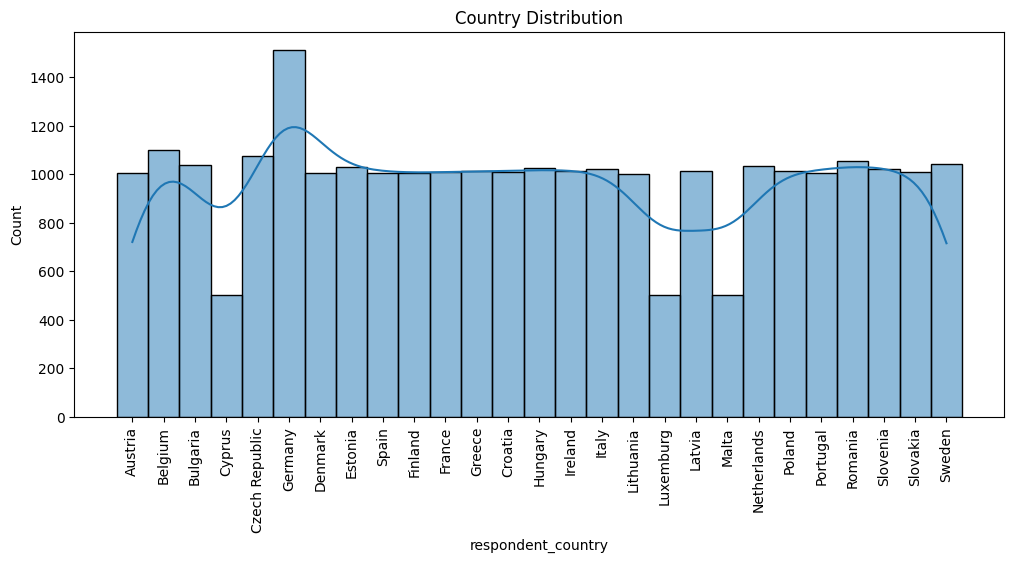

In [87]:
plt.figure(figsize=(12, 5))
sns.histplot(df['respondent_country'], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title('Country Distribution')

### Age

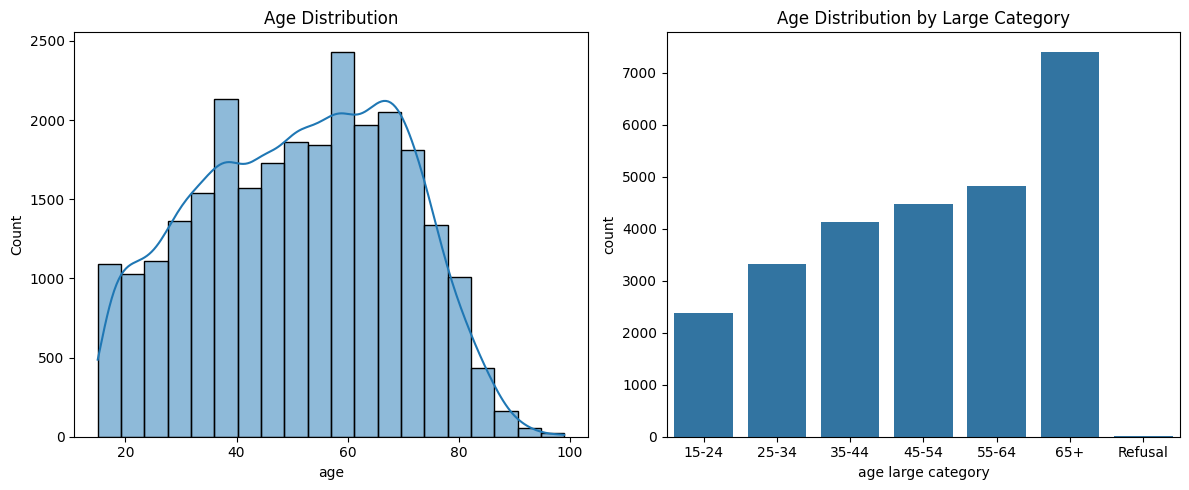

In [83]:
order = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Refusal']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='age large category', data=df, order=order)
plt.title('Age Distribution by Large Category')

plt.tight_layout()
plt.show()

### Nationality

Text(0.5, 1.0, 'Nationality Distribution')

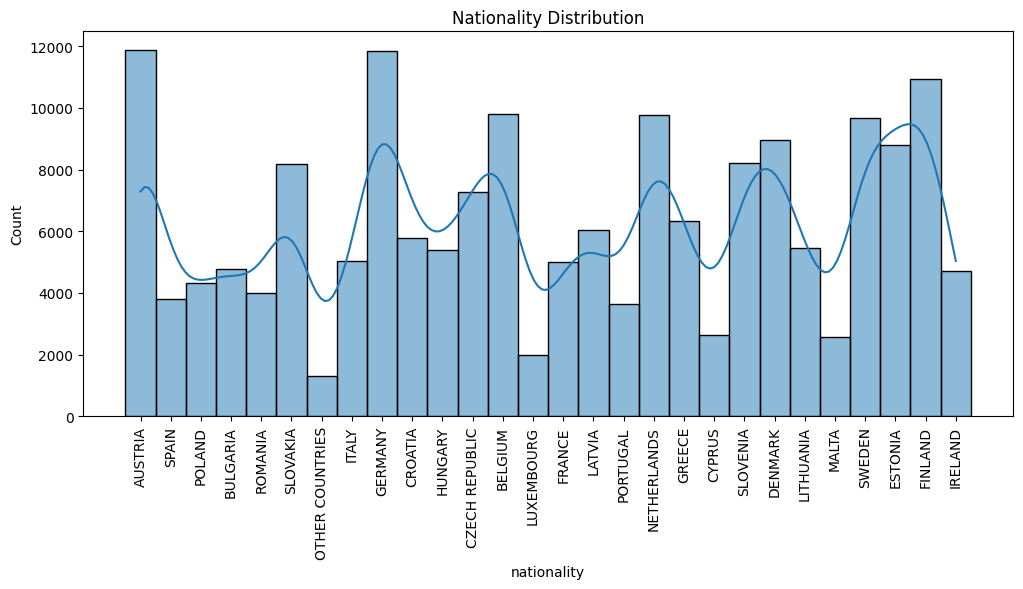

In [89]:
plt.figure(figsize=(12, 5))
sns.histplot(df_small['nationality'], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title('Nationality Distribution')

### Gender

Text(0.5, 1.0, 'Gender Distribution')

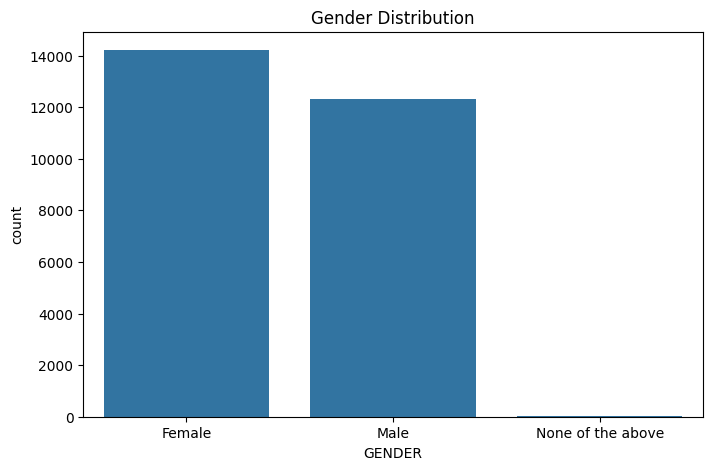

In [97]:
gender_map = {1: 'Male', 2: 'Female', 3: 'None of the above'}
plt.figure(figsize=(8, 5))
sns.countplot(x=df['GENDER'].replace(gender_map))
plt.title('Gender Distribution')

In [94]:
df['GENDER']

0        2
1        1
2        2
3        1
4        2
        ..
26564    1
26565    2
26566    2
26567    2
26568    1
Name: GENDER, Length: 26561, dtype: int64